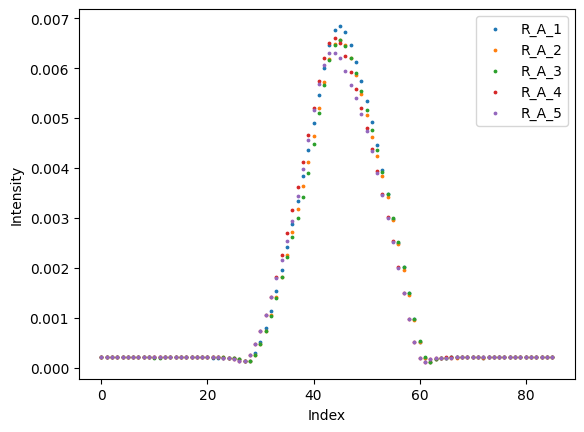

----- Results -----
The peak index is 44.4
----- ----- -----


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


def Calibration_Function(file_name, sheet_name, column_names):
    ext = os.path.splitext(file_name)[1].lower()
    if ext == ".csv":
        df = pd.read_csv(file_name)
    elif ext in [".xls", ".xlsx"]:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
    else:
        raise ValueError("Unsupported file type")

    df = df.dropna()

    amplitudes = [df[col] for col in column_names]

    index_list = np.arange(len(amplitudes[0]))

    max_intensity = [np.argmax(i) for i in amplitudes]

    plt.figure(1)

    for i in range(len(amplitudes)):
        plt.scatter(index_list, amplitudes[i], label=column_names[i], marker='o', s=3)

    plt.xlabel('Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.show()

    print("----- Results -----")
    print(f"The peak index is {np.mean(max_intensity)}")
    print("----- ----- -----")


file = "Trial.xlsx"
sheet_name = "Red"
column_names = ["R_A_1", "R_A_2", "R_A_3", "R_A_4", "R_A_5"]

Calibration_Function(file, sheet_name, column_names)